In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Phase de prétraitement :

# Import et affichage du jeu de données


In [2]:
#import dataset from CSV
import pandas as pd
df = pd.read_csv('titanic-passengers.csv',sep = ";")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# Les informations générales sur les colonnes et les valeurs de données.
df.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PassengerId  int64  
 1   Survived     object 
 2   Pclass       int64  
 3   Name         object 
 4   Sex          object 
 5   Age          float64
 6   SibSp        int64  
 7   Parch        int64  
 8   Ticket       object 
 9   Fare         float64
 10  Cabin        object 
 11  Embarked     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Les valeurs manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Remplacer les valeurs maquantes 
## données numeriques par la moyenne
## données categorielles par la valeur la plus frequente
df["Age"].fillna(df["Age"].mean(),inplace =True)
df["Cabin"].fillna("G6",inplace = True)
df["Embarked"].fillna("S",inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
# Transformation des données categorielles en données numeriques
## A chaud 1: Mr, 0:Mrs
## survived 0: non, 1:oui
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Cabin"]=encoder.fit_transform(df["Cabin"])
df["Ticket"]=encoder.fit_transform(df["Ticket"])
df["Survived"]=encoder.fit_transform(df["Survived"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,159,13.0000,145,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,347,7.6500,140,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,409,7.8542,145,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,395,21.0750,145,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,569,52.0000,38,S


# 2. Phase de Visualisation


###  la distrubition de l'age, des classes, des tickets, sex et la survie

<AxesSubplot:title={'center':'histogramme des ages'}, xlabel='Age', ylabel='Frequency'>

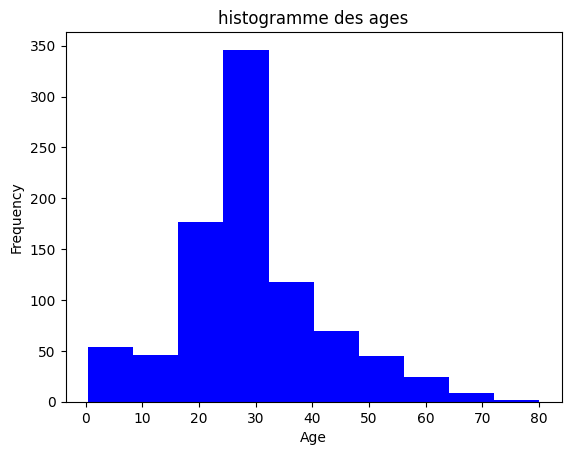

In [9]:
plt.title("histogramme des ages")
plt.xlabel("Age")
df["Age"].plot.hist(color = "blue")

<AxesSubplot:title={'center':'histogramme des classes'}, xlabel='Pclass', ylabel='Frequency'>

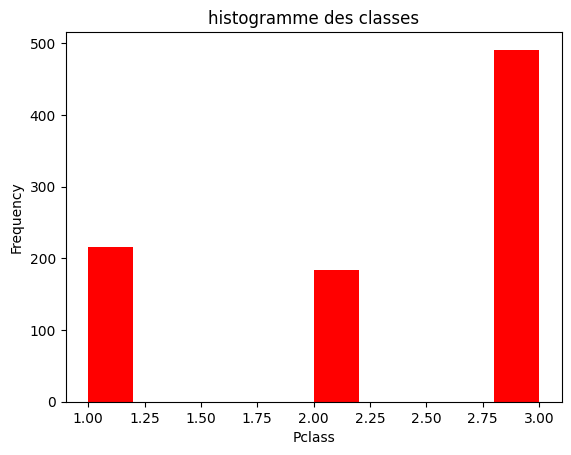

In [10]:
plt.title("histogramme des classes")
plt.xlabel("Pclass")
df["Pclass"].plot.hist(color = "red")


<AxesSubplot:title={'center':'histogramme des prix de tickets'}, xlabel='Fare', ylabel='Frequency'>

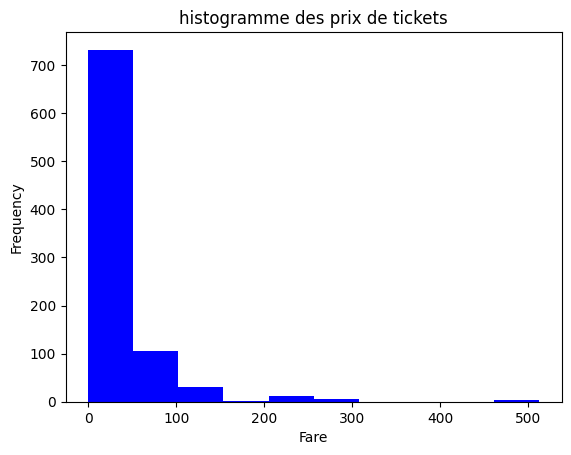

In [11]:
plt.subplot()
plt.title("histogramme des prix de tickets")
plt.xlabel("Fare")
df["Fare"].plot.hist(color = "blue")


<AxesSubplot:ylabel='Sex'>

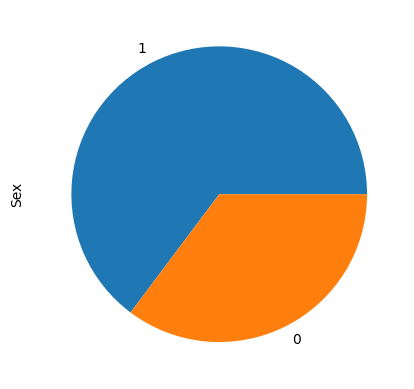

In [12]:
df.Sex.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Survived'>

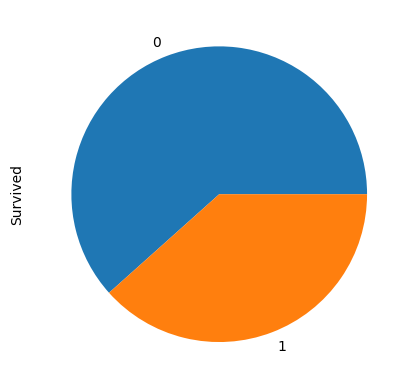

In [13]:
df.Survived.value_counts().plot(kind="pie")

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

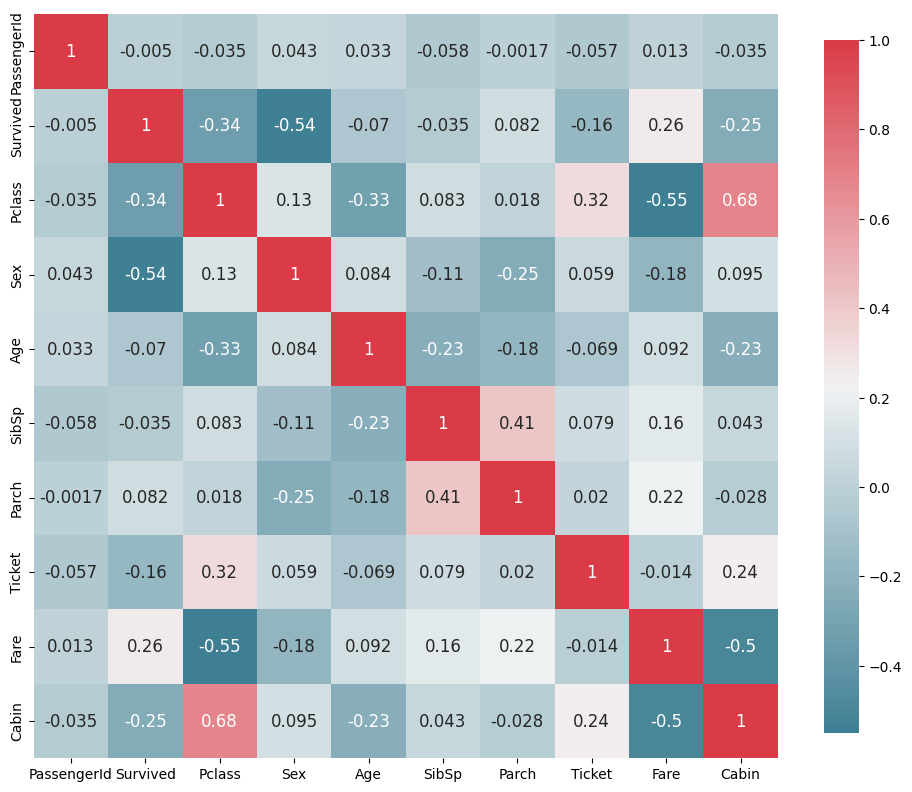

In [15]:
plot_correlation_map(df)

## Positive correlations are displayed in red and negative correlations in blue. The intensity of the color is proportional to the correlation coefficients. To the right of the correlogram, the color legend shows the correlation coefficients and the corresponding colors.

# Ap supervisé

### la regression logistique

In [35]:
X =df[["Age","Pclass","Cabin",'Sex']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [36]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [37]:
print("Accuracy={:.2f}".format(lg.score(X_test, y_test)))

Accuracy=0.80


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       155
           1       0.79      0.72      0.75       113

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### Nous avons obtenu une précision de 80 %. Voyons la matrice de confusion

<AxesSubplot:xlabel='col_0', ylabel='Survived'>

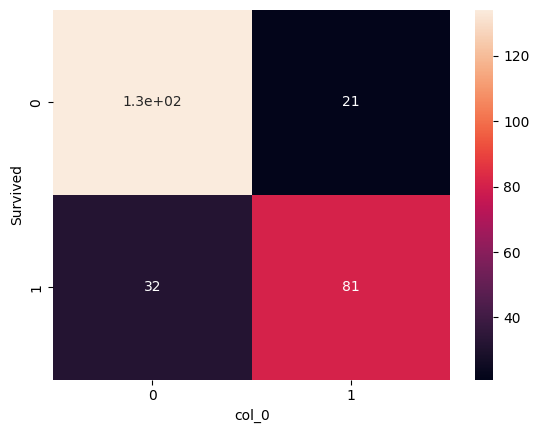

In [39]:
confusion_matrix = pd.crosstab(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)

### True positive: 130 (We predicted a positive result and it was positive)
### True negative: 81 (We predicted a negative result and it was negative)
### False positive: 32 (We predicted a positive result and it was negative)
### False negative: 21 (We predicted a negative result and it was positive)

# la classification ROC/AUC
###### Aire de calcul sous la courbe caractéristique de fonctionnement du récepteur (ROC AUC) \à partir des scores de prédiction.
###### Une courbe ROC qui signifie courbe de «caractéristique de fonctionnement du récepteur».
###### Il s'agit d'un graphique qui affiche la sensibilité("taux de vrais positifs") le long de l'axe y et (1 - spécificité(taux de vrai négatif)) le long de l'axe x, Cela signifie que le coin supérieur gauche du graphique est le point "idéal" - un taux de faux positifs de zéro et un taux de vrais positifs de un. Ce n'est pas très réaliste, mais cela signifie qu'une plus grande surface sous la courbe (AUC) est généralement meilleure
###### Une façon de quantifier la capacité du modèle de régression logistique à classer les données consiste à calculer l' AUC , qui signifie « aire sous la courbe ».
###### Plus l'AUC est proche de 1, meilleur est le modèle.

Text(0.5, 0, 'False Positive Rate')

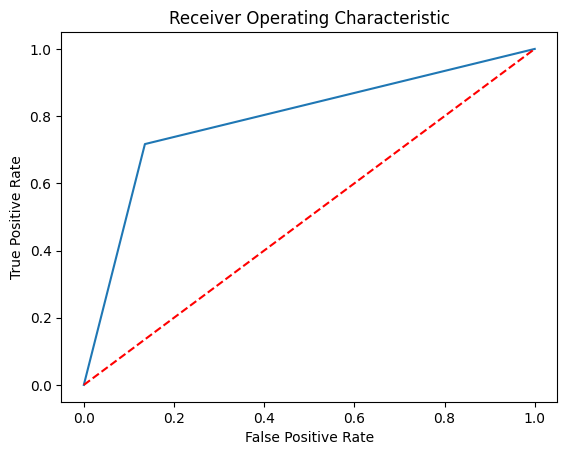

In [56]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr ) 
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#label = 'AUC = %0.2f' % roc_auc,,,,,,,#plt.legend(loc = 'lower right'),,,,,#roc_auc = metrics.auc(fpr, tpr)

In [51]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.7906651441621467